In [1]:
import csv
import pprint as pp
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_graph_adjacency_list_file_name = './small_graph__adjacency_list.tsv'
wiki_graph_adjacency_list_file_name = './wiki_graph__adjacency_list.tsv'

alpha = .15
epsilon = 10**-6

In [3]:
file = []
graph = {}
with open(wiki_graph_adjacency_list_file_name, 'r', newline='\n') as fp:
    file = fp.read().strip().split("\n")

In [4]:
for f in file:
    row = f.split("\r")[0].split("\t")
    graph[row[0]] = row[1:]

In [7]:
inverse_graph = {k:[] for k in graph.keys()}

In [6]:
len(graph)

1685

In [8]:
for node in graph:
    
    for ingoing in graph[node]:
        
        inverse_graph[ingoing].append(node)

In [9]:

def create_initial_pagerank_vector(graph):
    N = len(graph.keys())
    page_rank_vector = {k:1/N for k in graph.keys()}
    
    return page_rank_vector

In [146]:
page_rank_vector = create_initial_pagerank_vector(graph)

In [10]:
def single_iteration_page_rank(graph, reverse_graph, page_rank_vector, alpha):
    
    
    N = len(graph.keys())
    
    next_page_rank_vector = {k:0 for k in page_rank_vector.keys()}
    for node in page_rank_vector:
        
        if len(graph[node]) == 0:
            next_page_rank_vector[node] = 0
            
        else:
            for ingoing in reverse_graph[node]:
                next_page_rank_vector[node] += (1-alpha) * page_rank_vector[ingoing]/len(graph[ingoing])
    
    leakedPR = 1 - sum(next_page_rank_vector.values()) 
    
    for node in next_page_rank_vector:
        next_page_rank_vector[node] += leakedPR/N
        
    return next_page_rank_vector

In [11]:
def get_distance(vector0, vector1):
    
    vector0 = np.array(vector0)
    vector1 = np.array(vector1)
    distance = 0.
    distance = np.sum(abs(vector0-vector1))
    
    return distance

In [12]:
page_rank_vector = create_initial_pagerank_vector(graph)


convergence = []
distance = 1000
iteration = 0
while distance >= epsilon:
    
    page_rank_vector_new = single_iteration_page_rank(graph,inverse_graph,page_rank_vector, alpha)
    
    vector0 = []
    vector1 = []
    for node in graph:
        
        vector0.append(page_rank_vector[node])
        vector1.append(page_rank_vector_new[node])
    
    distance = get_distance(vector0,vector1)
    iteration += 1
    page_rank_vector = {k:page_rank_vector_new[k] for k in page_rank_vector_new}#copy.deepcopy(page_rank_vector_new)
    
    convergence.append([iteration,distance])
    
print(iteration)

52


In [13]:
convergence = np.array(convergence)

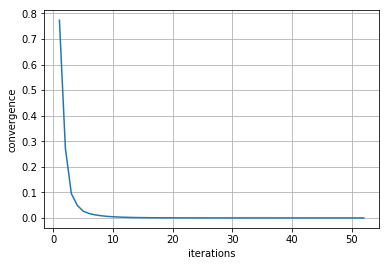

In [14]:
plt.plot(convergence[:,0],convergence[:,1])
plt.ylabel('convergence')
plt.xlabel("iterations")
plt.grid()
plt.show()

In [158]:
np.sum(list(page_rank_vector.values()))

1.0